In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#read the file from local folder
df_train = pd.read_csv("/Users/yanglulu/Desktop/tdi_rentals_dataset.csv")

In [2]:
df_train['rental'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: rental, dtype: float64

In [3]:
#check the info about the dataset to see if there is any Null value or if there is any data type that does not make sense.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   obs                731 non-null    int64  
 1   date               731 non-null    object 
 2   year               731 non-null    int64  
 3   month              731 non-null    int64  
 4   season             731 non-null    int64  
 5   holiday            731 non-null    int64  
 6   working_day        731 non-null    int64  
 7   weather_condition  731 non-null    int64  
 8   temp               731 non-null    float64
 9   feel_temp          731 non-null    float64
 10  humidity           731 non-null    float64
 11  wind_speed         731 non-null    float64
 12  occasional         731 non-null    int64  
 13  members            731 non-null    int64  
 14  rental             731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [4]:
df_train.describe()

,obs,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,humidity,wind_speed,occasional,members,rental
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,6.519836,2.496580,0.028728,0.683995,1.395349,20.310776,23.717699,0.627894,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,1.110807,0.167155,0.465233,0.544894,7.505091,8.148059,0.142429,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,4.000000,2.000000,0.000000,0.000000,1.000000,13.820424,16.892125,0.520000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,7.000000,3.000000,0.000000,1.000000,1.000000,20.431653,24.336650,0.626667,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,10.000000,3.000000,0.000000,1.000000,2.000000,26.872076,30.430100,0.730209,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,12.000000,4.000000,1.000000,1.000000,3.000000,35.328347,42.044800,0.972500,34.000021,3410.000000,6946.000000,8714.000000


In [39]:
y=df_train['rental']
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: rental, dtype: int64

In [40]:
X=df_train
X=X.drop(['rental','date'],axis=1)
X.head()

,obs,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,humidity,wind_speed,occasional,members
0,1,2011,1,1,0,0,2,14.110847,18.18125,0.805833,10.749882,331,654
1,2,2011,1,1,0,0,2,14.902598,17.68695,0.696087,16.652113,131,670
2,3,2011,1,1,0,1,1,8.050924,9.47025,0.437273,16.636703,120,1229
3,4,2011,1,1,0,1,1,8.200000,10.60610,0.590435,10.739832,108,1454
4,5,2011,1,1,0,1,1,9.305237,11.46350,0.436957,12.522300,82,1518


In [7]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import xgboost as xgb

In [8]:
models = []
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=10)
   print(name, cv_result.mean())

RF 0.971881418142541
Dtree 0.8917007194207391


In [41]:
X=X.drop(['members','occasional'],axis=1)
X.head()

,obs,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,humidity,wind_speed
0,1,2011,1,1,0,0,2,14.110847,18.18125,0.805833,10.749882
1,2,2011,1,1,0,0,2,14.902598,17.68695,0.696087,16.652113
2,3,2011,1,1,0,1,1,8.050924,9.47025,0.437273,16.636703
3,4,2011,1,1,0,1,1,8.200000,10.60610,0.590435,10.739832
4,5,2011,1,1,0,1,1,9.305237,11.46350,0.436957,12.522300


In [10]:
print(X)

     obs  year  month  season  holiday  working_day  weather_condition  \
0      1  2011      1       1        0            0                  2   
1      2  2011      1       1        0            0                  2   
2      3  2011      1       1        0            1                  1   
3      4  2011      1       1        0            1                  1   
4      5  2011      1       1        0            1                  1   
..   ...   ...    ...     ...      ...          ...                ...   
726  727  2012     12       1        0            1                  2   
727  728  2012     12       1        0            1                  2   
728  729  2012     12       1        0            0                  2   
729  730  2012     12       1        0            0                  1   
730  731  2012     12       1        0            1                  2   

          temp  feel_temp  humidity  wind_speed  
0    14.110847   18.18125  0.805833   10.749882  
1    14.902

In [26]:
print(X.values)

[[1.0000000e+00 2.0110000e+03 1.0000000e+00 ... 1.8181250e+01
  8.0583300e-01 1.0749882e+01]
 [2.0000000e+00 2.0110000e+03 1.0000000e+00 ... 1.7686950e+01
  6.9608700e-01 1.6652113e+01]
 [3.0000000e+00 2.0110000e+03 1.0000000e+00 ... 9.4702500e+00
  4.3727300e-01 1.6636703e+01]
 ...
 [7.2900000e+02 2.0120000e+03 1.2000000e+01 ... 1.2120000e+01
  7.5291700e-01 8.3336610e+00]
 [7.3000000e+02 2.0120000e+03 1.2000000e+01 ... 1.1585000e+01
  4.8333300e-01 2.3500518e+01]
 [7.3100000e+02 2.0120000e+03 1.2000000e+01 ... 1.1174350e+01
  5.7750000e-01 1.0374682e+01]]


In [42]:
X=X.values

In [78]:
y=df_train['members']

In [79]:
X=df_train[['temp','obs','year','season','working_day','weather_condition','wind_speed']].values
print(X)

[[1.4110847e+01 1.0000000e+00 2.0110000e+03 ... 0.0000000e+00
  2.0000000e+00 1.0749882e+01]
 [1.4902598e+01 2.0000000e+00 2.0110000e+03 ... 0.0000000e+00
  2.0000000e+00 1.6652113e+01]
 [8.0509240e+00 3.0000000e+00 2.0110000e+03 ... 1.0000000e+00
  1.0000000e+00 1.6636703e+01]
 ...
 [1.0386653e+01 7.2900000e+02 2.0120000e+03 ... 0.0000000e+00
  2.0000000e+00 8.3336610e+00]
 [1.0489153e+01 7.3000000e+02 2.0120000e+03 ... 0.0000000e+00
  1.0000000e+00 2.3500518e+01]
 [8.8491530e+00 7.3100000e+02 2.0120000e+03 ... 1.0000000e+00
  2.0000000e+00 1.0374682e+01]]


In [80]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR 0.08695149571655539
RF 0.3618111697949229
Dtree -0.21450634415734893


In [102]:
y=df_train['occasional']

In [103]:
#X=df_train[['temp','obs','year','working_day','weather_condition']].values
X=df_train[['working_day','temp']].values
print(X)

[[ 0.       14.110847]
 [ 0.       14.902598]
 [ 1.        8.050924]
 ...
 [ 0.       10.386653]
 [ 0.       10.489153]
 [ 1.        8.849153]]


In [104]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -1.5303563945983731
RF -0.10882976388058556
Dtree -0.3075853229511446


In [72]:
X=df_train[['members','occasional']].values
print(X)

[[ 654  331]
 [ 670  131]
 [1229  120]
 ...
 [1182  159]
 [1432  364]
 [2290  439]]


In [73]:
y=df_train['rental']

In [74]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR 1.0
RF 0.987614026734702
Dtree 0.9662433281477357


In [100]:
y=df_train['rental']
X=df_train[['temp','obs','year','season','working_day','weather_condition','wind_speed']].values
#X=df_train.drop(['rental','date','members','occasional'],axis=1)
print(X)

[[1.4110847e+01 1.0000000e+00 2.0110000e+03 ... 0.0000000e+00
  2.0000000e+00 1.0749882e+01]
 [1.4902598e+01 2.0000000e+00 2.0110000e+03 ... 0.0000000e+00
  2.0000000e+00 1.6652113e+01]
 [8.0509240e+00 3.0000000e+00 2.0110000e+03 ... 1.0000000e+00
  1.0000000e+00 1.6636703e+01]
 ...
 [1.0386653e+01 7.2900000e+02 2.0120000e+03 ... 0.0000000e+00
  2.0000000e+00 8.3336610e+00]
 [1.0489153e+01 7.3000000e+02 2.0120000e+03 ... 0.0000000e+00
  1.0000000e+00 2.3500518e+01]
 [8.8491530e+00 7.3100000e+02 2.0120000e+03 ... 1.0000000e+00
  2.0000000e+00 1.0374682e+01]]


In [96]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: rental, dtype: int64

In [97]:
X=X.values
print(X)

[[1.0000000e+00 2.0110000e+03 1.0000000e+00 ... 1.8181250e+01
  8.0583300e-01 1.0749882e+01]
 [2.0000000e+00 2.0110000e+03 1.0000000e+00 ... 1.7686950e+01
  6.9608700e-01 1.6652113e+01]
 [3.0000000e+00 2.0110000e+03 1.0000000e+00 ... 9.4702500e+00
  4.3727300e-01 1.6636703e+01]
 ...
 [7.2900000e+02 2.0120000e+03 1.2000000e+01 ... 1.2120000e+01
  7.5291700e-01 8.3336610e+00]
 [7.3000000e+02 2.0120000e+03 1.2000000e+01 ... 1.1585000e+01
  4.8333300e-01 2.3500518e+01]
 [7.3100000e+02 2.0120000e+03 1.2000000e+01 ... 1.1174350e+01
  5.7750000e-01 1.0374682e+01]]


In [101]:
from sklearn.svm import SVR
for kernel in ['linear','rbf']:
    svr = SVR(kernel=kernel)
    scores = cross_val_score(svr,X,y,cv=20)
    print('iteration:{}'.format(len(scores)))
    print('average score:{}'.format(scores.mean()))

iteration:20
average score:-0.3712077874568502
iteration:20
average score:-8.8615900853431


In [109]:
YearMon=df_train['year'].astype({"year": str})+df_train['month'].astype({"month": str})
print(YearMon)

0       20111
1       20111
2       20111
3       20111
4       20111
        ...  
726    201212
727    201212
728    201212
729    201212
730    201212
Length: 731, dtype: object


In [110]:
df_train['YearMon']=YearMon
df_train.head()

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,humidity,wind_speed,occasional,members,rental,YearMon
0,1,1/1/2011,2011,1,1,0,0,2,14.110847,18.18125,0.805833,10.749882,331,654,985,20111
1,2,1/2/2011,2011,1,1,0,0,2,14.902598,17.68695,0.696087,16.652113,131,670,801,20111
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,0.437273,16.636703,120,1229,1349,20111
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,0.590435,10.739832,108,1454,1562,20111
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,0.436957,12.522300,82,1518,1600,20111


In [121]:
y=df_train['rental']
X=df_train[['temp','obs','year', 'season','working_day','weather_condition','wind_speed','YearMon']].values

In [122]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -0.2862911253855033
RF 0.197722121214309
Dtree -0.2673261271247603


<AxesSubplot:xlabel='occasional', ylabel='Density'>

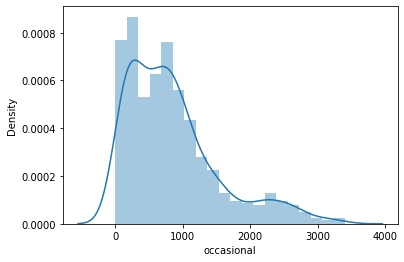

In [124]:
sns.distplot(df_train['occasional'])

In [125]:
df_train['log_occasional'] = np.log2(df_train['occasional'])

In [126]:
df_train.head()

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,humidity,wind_speed,occasional,members,rental,YearMon,log_occasional
0,1,1/1/2011,2011,1,1,0,0,2,14.110847,18.18125,0.805833,10.749882,331,654,985,20111,8.370687
1,2,1/2/2011,2011,1,1,0,0,2,14.902598,17.68695,0.696087,16.652113,131,670,801,20111,7.033423
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,0.437273,16.636703,120,1229,1349,20111,6.906891
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,0.590435,10.739832,108,1454,1562,20111,6.754888
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,0.436957,12.522300,82,1518,1600,20111,6.357552


<AxesSubplot:xlabel='log_occasional', ylabel='Density'>

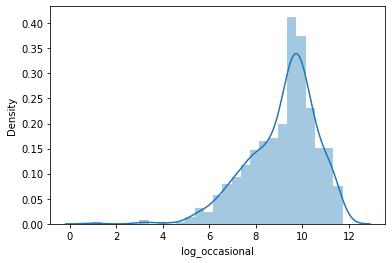

In [127]:
sns.distplot(df_train['log_occasional'])

In [128]:
df_train['log_log_occasional'] = np.log2(df_train['log_occasional'])

<AxesSubplot:xlabel='log_log_occasional', ylabel='Density'>

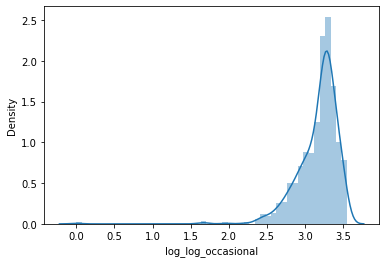

In [129]:
sns.distplot(df_train['log_log_occasional'])

In [130]:
X=df_train[['temp','obs','year','season','working_day','weather_condition','wind_speed']].values
y=df_train['log_occasional']
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR 0.047966851881857994
RF 0.5327928003364643
Dtree -0.16495785098602003


In [134]:
X=df_train[['log_occasional','members']].values
y=df_train['rental']
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR 0.6583032127926949
RF 0.9867486634906347
Dtree 0.9645356552774678


<AxesSubplot:xlabel='temp', ylabel='Density'>

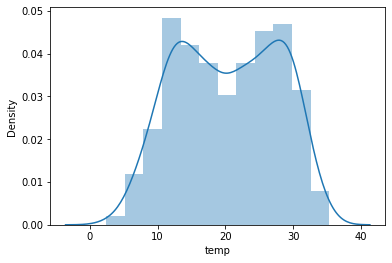

In [135]:
#so, we can use RF to predict 'members' and 'log_occasional', then use RF again to predict 'rental' based on 'members' and 'log_occasional'
#now plot other variables to see distribution
sns.distplot(df_train['temp'])

In [136]:
df_train['log_temp'] = np.log2(df_train['temp'])

<AxesSubplot:xlabel='log_temp', ylabel='Density'>

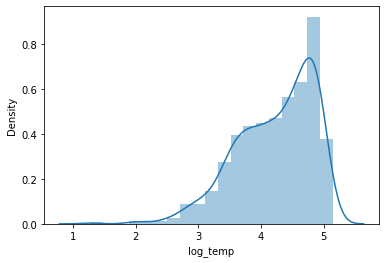

In [137]:
sns.distplot(df_train['log_temp'])

<AxesSubplot:xlabel='log_log_temp', ylabel='Density'>

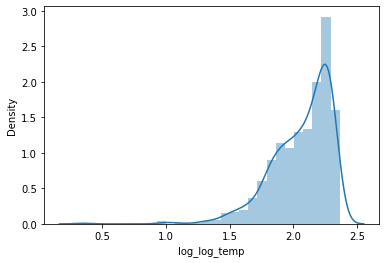

In [138]:
df_train['log_log_temp'] = np.log2(df_train['log_temp'])
sns.distplot(df_train['log_log_temp'])

In [139]:
y=df_train['rental']
X=df_train[['log_temp','obs','year', 'season','working_day','weather_condition','wind_speed','YearMon']].values

In [140]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -0.3051305421357444
RF 0.20373681989614606
Dtree -0.38387185112153244


<AxesSubplot:xlabel='working_day', ylabel='Density'>

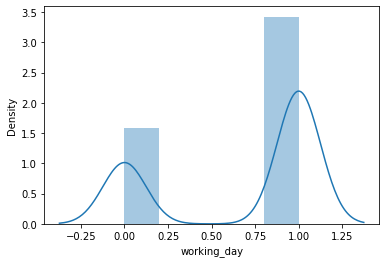

In [141]:

sns.distplot(df_train['working_day'])

In [ ]:
df_train['log_log_temp'] = np.log2(df_train['log_temp'])
sns.distplot(df_train['log_log_temp'])

In [142]:
weekday = df_train[(df_train["working_day"]==1)]
weekday.head()

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,...,wind_speed,occasional,members,rental,YearMon,log_occasional,log_log_occasional,log_rental,log_temp,log_log_temp
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,...,16.636703,120,1229,1349,20111,6.906891,2.788036,10.397675,3.009154,1.589358
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,...,10.739832,108,1454,1562,20111,6.754888,2.755932,10.609179,3.035624,1.601993
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,...,12.522300,82,1518,1600,20111,6.357552,2.668471,10.643856,3.218043,1.686184
5,6,1/6/2011,2011,1,1,0,1,1,8.378268,11.66045,...,6.000868,88,1518,1606,20111,6.459432,2.691407,10.649256,3.066652,1.616664
6,7,1/7/2011,2011,1,1,0,1,2,8.057402,10.44195,...,11.304642,148,1362,1510,20111,7.209453,2.849890,10.560333,3.010315,1.589914


In [143]:
holiday = df_train[(df_train["working_day"]==0)]

In [145]:
y=weekday['rental']
X=weekday[['log_temp','obs','year', 'season','weather_condition','wind_speed','YearMon']].values

In [146]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -0.23401044903161097
RF 0.25707157403479874
Dtree -0.3027159361513661


In [147]:
y=holiday['rental']
X=holiday[['log_temp','obs','year', 'season','weather_condition','wind_speed','YearMon']].values

In [148]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -5.539030456123288
RF -1.5445068134644795
Dtree -2.7313475197552473


In [159]:
y=df_train['rental']
X=df_train[['log_temp','obs','year', 'season','working_day','weather_condition','wind_speed','YearMon']].values

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35)
rf=RandomForestRegressor().fit(X_train,y_train)

In [161]:
print('train_score:{:.2f}'.format(rf.score(X_train,y_train)))
print('test_score:{:.2f}'.format(rf.score(X_test,y_test)))

train_score:0.98
test_score:0.86


In [158]:
print(cross_val_score(RandomForestRegressor(),X,y,cv=20).mean())

0.19256512465352055


In [163]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_pp = scaler.transform(X_train)
X_test_pp = scaler.transform(X_test)
rf=RandomForestRegressor().fit(X_train_pp,y_train)
print('train_score:{:.2f}'.format(rf.score(X_train_pp,y_train)))
print('test_score:{:.2f}'.format(rf.score(X_test_pp,y_test)))

train_score:0.98
test_score:0.87


In [191]:
dummies = pd.get_dummies(df_train.season)

In [192]:
merged = pd.concat([df_train,dummies],axis='columns')
merged

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,...,YearMon,log_occasional,log_log_occasional,log_rental,log_temp,log_log_temp,1,2,3,4
0,1,1/1/2011,2011,1,1,0,0,2,14.110847,18.18125,...,20111,8.370687,3.065346,9.943980,3.818733,1.933094,1,0,0,0
1,2,1/2/2011,2011,1,1,0,0,2,14.902598,17.68695,...,20111,7.033423,2.814227,9.645658,3.897492,1.962546,1,0,0,0
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,...,20111,6.906891,2.788036,10.397675,3.009154,1.589358,1,0,0,0
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,...,20111,6.754888,2.755932,10.609179,3.035624,1.601993,1,0,0,0
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,...,20111,6.357552,2.668471,10.643856,3.218043,1.686184,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,2012,12,1,0,1,2,10.420847,11.33210,...,201212,7.948367,2.990659,11.045760,3.381401,1.757621,1,0,0,0
727,728,12/28/2012,2012,12,1,0,1,2,10.386653,12.75230,...,201212,9.330917,3.222019,11.595724,3.376659,1.755596,1,0,0,0
728,729,12/29/2012,2012,12,1,0,0,2,10.386653,12.12000,...,201212,7.312883,2.870440,10.389094,3.376659,1.755596,1,0,0,0
729,730,12/30/2012,2012,12,1,0,0,1,10.489153,11.58500,...,201212,8.507795,3.088785,10.810572,3.390826,1.761637,1,0,0,0


In [193]:
merged=merged.rename(columns={1: "spring", 2: "summer", 3: "fall", 4:"winter"})

In [194]:
merged.head()

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,...,YearMon,log_occasional,log_log_occasional,log_rental,log_temp,log_log_temp,spring,summer,fall,winter
0,1,1/1/2011,2011,1,1,0,0,2,14.110847,18.18125,...,20111,8.370687,3.065346,9.943980,3.818733,1.933094,1,0,0,0
1,2,1/2/2011,2011,1,1,0,0,2,14.902598,17.68695,...,20111,7.033423,2.814227,9.645658,3.897492,1.962546,1,0,0,0
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,...,20111,6.906891,2.788036,10.397675,3.009154,1.589358,1,0,0,0
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,...,20111,6.754888,2.755932,10.609179,3.035624,1.601993,1,0,0,0
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,...,20111,6.357552,2.668471,10.643856,3.218043,1.686184,1,0,0,0


In [197]:
y=merged['rental']
#X=merged[['log_temp','spring','summer','fall','working_day','weather_condition','wind_speed','YearMon']].values
X=merged[['log_temp','obs','year', 'spring','summer','fall','working_day','weather_condition','wind_speed','YearMon']].values

In [198]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -0.29821230971844065
RF 0.19202271136672064
Dtree -0.45053172449400086


In [199]:
dummies = pd.get_dummies(df_train['working_day'])

In [200]:
merged = pd.concat([merged,dummies],axis='columns')
merged

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,...,log_log_occasional,log_rental,log_temp,log_log_temp,spring,summer,fall,winter,0,1
0,1,1/1/2011,2011,1,1,0,0,2,14.110847,18.18125,...,3.065346,9.943980,3.818733,1.933094,1,0,0,0,1,0
1,2,1/2/2011,2011,1,1,0,0,2,14.902598,17.68695,...,2.814227,9.645658,3.897492,1.962546,1,0,0,0,1,0
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,...,2.788036,10.397675,3.009154,1.589358,1,0,0,0,0,1
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,...,2.755932,10.609179,3.035624,1.601993,1,0,0,0,0,1
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,...,2.668471,10.643856,3.218043,1.686184,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,2012,12,1,0,1,2,10.420847,11.33210,...,2.990659,11.045760,3.381401,1.757621,1,0,0,0,0,1
727,728,12/28/2012,2012,12,1,0,1,2,10.386653,12.75230,...,3.222019,11.595724,3.376659,1.755596,1,0,0,0,0,1
728,729,12/29/2012,2012,12,1,0,0,2,10.386653,12.12000,...,2.870440,10.389094,3.376659,1.755596,1,0,0,0,1,0
729,730,12/30/2012,2012,12,1,0,0,1,10.489153,11.58500,...,3.088785,10.810572,3.390826,1.761637,1,0,0,0,1,0


In [201]:
merged=merged.rename(columns={0: "weekend_holiday", 1: "workingday"})
merged.head()

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,...,log_log_occasional,log_rental,log_temp,log_log_temp,spring,summer,fall,winter,weekend_holiday,workingday
0,1,1/1/2011,2011,1,1,0,0,2,14.110847,18.18125,...,3.065346,9.943980,3.818733,1.933094,1,0,0,0,1,0
1,2,1/2/2011,2011,1,1,0,0,2,14.902598,17.68695,...,2.814227,9.645658,3.897492,1.962546,1,0,0,0,1,0
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,...,2.788036,10.397675,3.009154,1.589358,1,0,0,0,0,1
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,...,2.755932,10.609179,3.035624,1.601993,1,0,0,0,0,1
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,...,2.668471,10.643856,3.218043,1.686184,1,0,0,0,0,1


In [204]:
y=merged['rental']
#X=merged[['log_temp','spring','summer','fall','workingday','weather_condition','wind_speed','YearMon']].values
X=merged[['log_temp','obs','year', 'spring','summer','fall','workingday','weather_condition','wind_speed','YearMon']].values

In [205]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -0.29821230971844065
RF 0.2136601214053057
Dtree -0.3919529402401401


In [206]:
dummies = pd.get_dummies(df_train['weather_condition'])
merged = pd.concat([merged,dummies],axis='columns')
merged

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,...,log_log_temp,spring,summer,fall,winter,weekend_holiday,workingday,1,2,3
0,1,1/1/2011,2011,1,1,0,0,2,14.110847,18.18125,...,1.933094,1,0,0,0,1,0,0,1,0
1,2,1/2/2011,2011,1,1,0,0,2,14.902598,17.68695,...,1.962546,1,0,0,0,1,0,0,1,0
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,...,1.589358,1,0,0,0,0,1,1,0,0
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,...,1.601993,1,0,0,0,0,1,1,0,0
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,...,1.686184,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,2012,12,1,0,1,2,10.420847,11.33210,...,1.757621,1,0,0,0,0,1,0,1,0
727,728,12/28/2012,2012,12,1,0,1,2,10.386653,12.75230,...,1.755596,1,0,0,0,0,1,0,1,0
728,729,12/29/2012,2012,12,1,0,0,2,10.386653,12.12000,...,1.755596,1,0,0,0,1,0,0,1,0
729,730,12/30/2012,2012,12,1,0,0,1,10.489153,11.58500,...,1.761637,1,0,0,0,1,0,1,0,0


In [207]:
merged=merged.rename(columns={1: "clear", 2: "cloudy", 3:"light_rain_snow"})
merged.head()

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,...,log_log_temp,spring,summer,fall,winter,weekend_holiday,workingday,clear,cloudy,light_rain_snow
0,1,1/1/2011,2011,1,1,0,0,2,14.110847,18.18125,...,1.933094,1,0,0,0,1,0,0,1,0
1,2,1/2/2011,2011,1,1,0,0,2,14.902598,17.68695,...,1.962546,1,0,0,0,1,0,0,1,0
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,...,1.589358,1,0,0,0,0,1,1,0,0
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,...,1.601993,1,0,0,0,0,1,1,0,0
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,...,1.686184,1,0,0,0,0,1,1,0,0


In [211]:
y=merged['rental']
#X=merged[['log_temp','spring','summer','fall','workingday','weather_condition','wind_speed','YearMon']].values
X=merged[['log_temp','obs','year', 'spring','summer','fall','workingday','clear','cloudy','wind_speed','YearMon']].values

In [212]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -0.2736539661517914
RF 0.17552503028914282
Dtree -0.4028245949862036


In [213]:
dummies = pd.get_dummies(df_train['month'])
merged = pd.concat([merged,dummies],axis='columns')
merged

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,...,3,4,5,6,7,8,9,10,11,12
0,1,1/1/2011,2011,1,1,0,0,2,14.110847,18.18125,...,0,0,0,0,0,0,0,0,0,0
1,2,1/2/2011,2011,1,1,0,0,2,14.902598,17.68695,...,0,0,0,0,0,0,0,0,0,0
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,...,0,0,0,0,0,0,0,0,0,0
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,...,0,0,0,0,0,0,0,0,0,0
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,2012,12,1,0,1,2,10.420847,11.33210,...,0,0,0,0,0,0,0,0,0,1
727,728,12/28/2012,2012,12,1,0,1,2,10.386653,12.75230,...,0,0,0,0,0,0,0,0,0,1
728,729,12/29/2012,2012,12,1,0,0,2,10.386653,12.12000,...,0,0,0,0,0,0,0,0,0,1
729,730,12/30/2012,2012,12,1,0,0,1,10.489153,11.58500,...,0,0,0,0,0,0,0,0,0,1


In [214]:
merged=merged.rename(columns={1: "Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
merged.head()

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,1/1/2011,2011,1,1,0,0,2,14.110847,18.18125,...,0,0,0,0,0,0,0,0,0,0
1,2,1/2/2011,2011,1,1,0,0,2,14.902598,17.68695,...,0,0,0,0,0,0,0,0,0,0
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,...,0,0,0,0,0,0,0,0,0,0
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,...,0,0,0,0,0,0,0,0,0,0
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,0


In [215]:
y=merged['rental']
#X=merged[['log_temp','spring','summer','fall','workingday','weather_condition','wind_speed','YearMon']].values
X=merged[['log_temp','obs','year', 'spring','summer','fall','workingday','clear','cloudy','wind_speed','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']].values

In [216]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -0.38767702050956493
RF 0.1286095748986363
Dtree -0.301266369784349


In [217]:
dummies = pd.get_dummies(df_train['year'])
merged = pd.concat([merged,dummies],axis='columns')
merged

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,2011,2012
0,1,1/1/2011,2011,1,1,0,0,2,14.110847,18.18125,...,0,0,0,0,0,0,0,0,1,0
1,2,1/2/2011,2011,1,1,0,0,2,14.902598,17.68695,...,0,0,0,0,0,0,0,0,1,0
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,...,0,0,0,0,0,0,0,0,1,0
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,...,0,0,0,0,0,0,0,0,1,0
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,2012,12,1,0,1,2,10.420847,11.33210,...,0,0,0,0,0,0,0,1,0,1
727,728,12/28/2012,2012,12,1,0,1,2,10.386653,12.75230,...,0,0,0,0,0,0,0,1,0,1
728,729,12/29/2012,2012,12,1,0,0,2,10.386653,12.12000,...,0,0,0,0,0,0,0,1,0,1
729,730,12/30/2012,2012,12,1,0,0,1,10.489153,11.58500,...,0,0,0,0,0,0,0,1,0,1


In [218]:
merged=merged.rename(columns={2011: "2011", 2012: "2012"})
merged.head()

,obs,date,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,2011,2012
0,1,1/1/2011,2011,1,1,0,0,2,14.110847,18.18125,...,0,0,0,0,0,0,0,0,1,0
1,2,1/2/2011,2011,1,1,0,0,2,14.902598,17.68695,...,0,0,0,0,0,0,0,0,1,0
2,3,1/3/2011,2011,1,1,0,1,1,8.050924,9.47025,...,0,0,0,0,0,0,0,0,1,0
3,4,1/4/2011,2011,1,1,0,1,1,8.200000,10.60610,...,0,0,0,0,0,0,0,0,1,0
4,5,1/5/2011,2011,1,1,0,1,1,9.305237,11.46350,...,0,0,0,0,0,0,0,0,1,0


In [219]:
y=merged['rental']
#X=merged[['log_temp','spring','summer','fall','workingday','weather_condition','wind_speed','YearMon']].values
X=merged[['log_temp','obs','2011', 'spring','summer','fall','workingday','clear','cloudy','wind_speed','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']].values

In [220]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -0.3876770205122648
RF 0.13258349970182945
Dtree -0.28919716188936273


In [221]:
y=merged['rental']
#X=merged[['log_temp','spring','summer','fall','workingday','weather_condition','wind_speed','YearMon']].values
X=merged[['log_temp','2011', 'spring','summer','fall','workingday','clear','cloudy','wind_speed','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']].values

In [222]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -0.3690855824295439
RF 0.05288189706383713
Dtree -0.7923876204478921


In [223]:
y=merged['rental']
#X=merged[['log_temp','spring','summer','fall','workingday','weather_condition','wind_speed','YearMon']].values
X=merged[['log_temp','2011', 'workingday','clear','cloudy','wind_speed','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']].values

In [224]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -0.40486466981621544
RF -0.25962150510209353
Dtree -1.192884917163093


In [225]:
y=merged['rental']
#X=merged[['log_temp','spring','summer','fall','workingday','weather_condition','wind_speed','YearMon']].values
X=merged[['log_temp','2011', 'spring','summer','fall','workingday','clear','cloudy','wind_speed']].values

In [226]:
models = []
models.append(("LR",LinearRegression()))
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestRegressor()))
#models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
#models.append(("KNN",KNeighborsClassifier()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=20)
   print(name, cv_result.mean())

LR -0.314526280036406
RF 0.09412629629610382
Dtree -0.6107315547439935


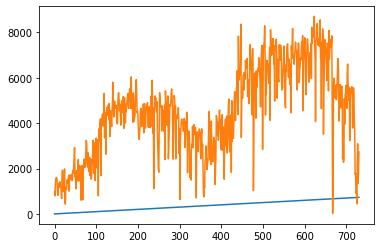

In [229]:
data=df_train[['obs','rental']]
plt.plot(data)

<AxesSubplot:xlabel='wind_speed', ylabel='Density'>

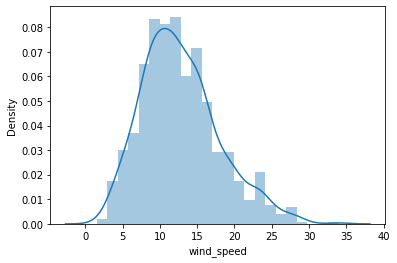

In [230]:
sns.distplot(df_train['wind_speed'])

<AxesSubplot:xlabel='humidity', ylabel='Density'>

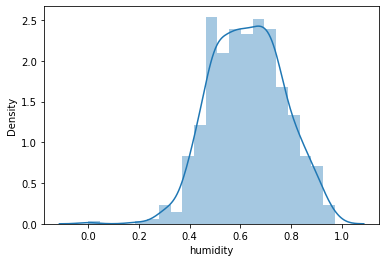

In [232]:
sns.distplot(df_train['humidity'])

<AxesSubplot:xlabel='feel_temp', ylabel='Density'>

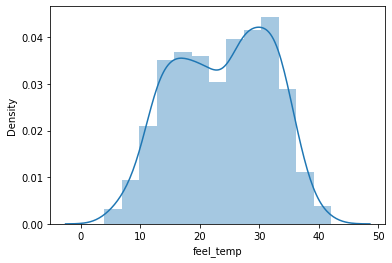

In [233]:
sns.distplot(df_train['feel_temp'])

<AxesSubplot:xlabel='log_feel_temp', ylabel='Density'>

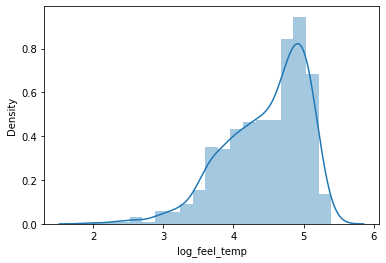

In [242]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
sfm = SelectFromModel(RandomForestRegressor(n_estimators=100,random_state=38),threshold='median')

X=merged.drop(['rental','log_rental','log_log_temp','YearMon','weekend_holiday','light_rain_snow','Dec','2012','winter','date','occasional','log_occasional','log_log_occasional','members','obs','year','month','season','holiday','working_day','weather_condition','temp','feel_temp'],axis=1)
y=merged['rental']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
#lr=LinearRegression().fit(X_train,y_train) 
#print('train_score:{:.2f}'.format(lr.score(X_train,y_train)))
#print('test_score:{:.2f}'.format(lr.score(X_test,y_test)))

sfm.fit(X_train,y_train)
X_train_sfm=sfm.transform(X_train)
mask_sfm=sfm.get_support()
print(mask_sfm)

[ True  True  True  True  True False  True  True  True False False  True
 False False False False False False  True False  True]


In [238]:
print(X_train_sfm)

[[0.482917 14.958889 41 ... 0 0 1]
 [0.394167 14.041257 981 ... 0 0 1]
 [0.667917 8.875021 314 ... 0 0 0]
 ...
 [0.46625 19.458743 663 ... 0 0 0]
 [0.423043 6.305571 139 ... 0 0 1]
 [0.567917 15.709557 394 ... 0 0 0]]


In [239]:
merged.columns

Index(['obs', 'date', 'year', 'month', 'season', 'holiday', 'working_day',
       'weather_condition', 'temp', 'feel_temp', 'humidity', 'wind_speed',
       'occasional', 'members', 'rental', 'YearMon', 'log_occasional',
       'log_log_occasional', 'log_rental', 'log_temp', 'log_log_temp',
       'spring', 'summer', 'fall', 'winter', 'weekend_holiday', 'workingday',
       'clear', 'cloudy', 'light_rain_snow', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2011', '2012'],
      dtype='object')

In [244]:
X_test_sfm=sfm.transform(X_test)
rf_sfm=RandomForestRegressor(random_state=38)
rf_sfm.fit(X_train_sfm,y_train)
print('score:{:.2f}'.format(rf_sfm.score(X_test_sfm,y_test)))

score:0.85
